# **Building a Neural Network from Scratch**

#### **What is a Neural Network?**

Artificial Neural Networks are a subset of machine learning that aims to simulate how the human brain works. They take data and essentially train themselves to gain insight out of the data before being able to predict the output for data inputted into the model in the future. 

Artificial Neural Networks are essentially a relationship between inputs and outputs where each connection has an importance (weight). This is exactly how our brain works when making decisions - when faced with 'data' our brain will prioritise the most important features of that data to make a decision on what that data is or what decisions to make next. 

Neural Networks can be used for a multitude of things from classification to speech recognition to computer vision to Natural Language Processing. A neural network has an input layer, a hidden layer, and an output layer, and a perceptron is one without a hidden layer. The latter tend to be used for much simpler decision making. 

A neural network has two steps essentially:

* Feedforward propagation which describes a forward movement of information using random weights, these random weights are then improved using backpropagation. 
* Backpropagation is essentially the calculation of an error between a predicted output and a target which allows the model to update the weight values afterwards. 

#### **Backpropagation**

The weight given for each input is essentially dictating how important that piece of information is to making the final prediction. Therefore ensuring the weights are as correct as possible is vital to a successful model. Backpropagation allows us to start with random weights and then adjust these weights once we can see the first round of predictions. This process of going back and altering the weight is called backpropagation, and we repeat this until the error is minimised.

Therefore an Artificial Neural Network can be summarised as a 'cycle' of some sorts. The model takes in an input and randomly assigns weight (we can assign weights manually which will create bias), the output is created, the error is calculated, then the weights are updated and the process will repeat itself. This continues until the error is acceptable and only then will the model be ready for prediction. 

#### **Derivation of the Backpropagation Algorithm**

We need three things to train a neural network using gradient descent. Firstly, we need a dataset with input and output pairs of size N and this is called X. Then, we need a feedforward neural network with parameters. The parameter that is important is the weight between node j in layer k and node i in layer k-1, and the bias for node i in layer k. Thirdly, we need an error function that is able to define the error between the needed y value and the outputted y value from the neural network. 

If $θ^{t}$ is considered the collective parameters of the neural network for iteration $t$ then gradient descent will update these parameters using:

$$

θ^{t+1} = θ^{t} - α\frac{\partial E(X,θ^{t})}{\partial θ} \tag{1}

$$


Where $X$ is the dataset with $x,y$ value pairs, $α$ is the learning rate, and $E(X,θ)$ is the error function with respect to weights $w_{ij}^{k}$ and biases $b_{i}^{k}$. This says that as error tends towards zero the weights between iterations will tend towards being equal meaning we have reached an 'optimum weight'. 

The below uses mean of square errors which is one of many error functions that can be used depending on need. This tends to be the standard error function as it has always been associated with errors. Here we multiply by $\frac {1}{2}$ to eliminate the 2 that comes down from the square when differentiating. 

$$
E(X,θ) = \frac{1}{2N}\sum_{i=1}^{N}(\hat{y_{i}} - y_{i})^{2} \tag{2}
$$

Where $y_{i}$ is the target value in the input-output pair, and $\hat{y_{i}}$ is the computed output.

Hidden layers in a neural network don't have a defined output so errors will be computed using parameters of previous and following layers. Backpropagation aims to simplify the mathematics of gradient descent between layers. Taking the error function above, backpropagation aims to minimise this function with respect to the weights.

$$
\frac{\partial E(X,θ)}{\partial w_{ij}^{k}} = \frac{1}{N} \sum_{d=1}^{N} \frac{\partial (\frac{1}{2} (\hat{y_{d}} - y_{d})^{2})}{\partial w_{ij}^{k}} \tag{3}
$$

If we consider $E_{d}$ = $\frac{1}{2} (\hat{y_{d}} - y_{d})^{2}$ then we can write the above as:

$$
\frac{\partial E(X,θ)}{\partial w_{ij}^{k}} =\frac{1}{N} \sum_{d=1}^{N} \frac{\partial E_{d}}{\partial w_{ij}^{k}} \tag{4}
$$

Finally, to continue with the derivation of the backpropagation algorithm, we need to calculate the activation:

$$
a_{i}^{k} = b_{i}^{k} + \sum_{j=1}^{r_{k-1}} w_{ji}^{k}o_{j}^{k-1} \tag{5}
$$

Where $w_{ij}^{k}$ is the weight for node $j$ in layer $l_{k}$ for incoming node $i$, $b_{i}^{k}$ is the bias for node $i$ in layer $l_{k}$, $a_{i}^{k}$ is the product sum plus bias for node $i$ in layer $l_{k}$, $o_{i}^{k}$ is the output for note $i$ in layer $l_{k}$, and $r_{k}$ is the number of nodes in layer $l_{k}$

For simplification purposes, we can consider $b_{i}^{k}$ an initial 'weight' for stage $j = 0$:

$$
a_{i}^{k} = \sum_{j=0}^{r_{k-1}} w_{ji}^{k}o_{j}^{k-1} \tag{6}
$$

Gradient descent updates weights and biases - to simplify mathematics we combined these two in the stage above and considered bias as an initial weight for stage j = 0 leaving us with only one function for weights.

Now that we have all of these, we can start to work out the error function derivative. We use the chain rule to get the error function's partial derivative.

$$
\frac {\partial E}{\partial w_{ij}^{k}} = \frac {\partial E}{\partial a_{j}^{k}} \frac {\partial a_{j}^{k}}{\partial w_{ij}^{k}} \tag{7}
$$

Where $a_{j}^{k}$ is the activation of node j in layer k before its passed to the nonlinear activation function to generate output. Neural Networks tend to use non-learn activation functions as they make it easier to adapt data and differentiate between outcomes. For a two-class classifier, a sigmoid activation function is used as the output is always between 0 and 1 for input (-∞,∞). Other non-linear activation functions can include Tanh which will map values to between -1 and 1. More complex non-linear activation functions include ReLU used in computer vision.

In the above expression, $\frac {\partial E}{\partial a_{j}^{k}}$ can be called the **error** $δ_{j}^{k}$. The reason for this is where backpropagation gets its name. For a single output neural network, backpropagation defines the value $δ_{1}^{m}$ where $m$ is the final layer. So for this neural network we can express the error function as:

$$
E = \frac {1}{2} (\hat {y} - y)^{2} = \frac {1}{2} (g_{o}(a_{1}^{m}) - y)^{2} \tag{8}
$$

Where $g_{o}(x)$ is the activation function for the output layer.

Therefore differentiating the above we can get $δ_{1}^{m}$:

$$
δ_{1}^{m} = (g_{0}(a_{1}^{m}) - y)g_{o}^{'}(a_{a}^{m}) = (\hat {y} - y)g_{o}^{'}(a_{1}^{m}) \tag{9}
$$

In equation $(6)$ and $(7)$ we can express $\frac {\partial a_{j}^{k}}{\partial w_{ij}^{k}}$ as the following:

$$
\frac {\partial a_{j}^{k}}{\partial w_{ij}^{k}} = \frac {\partial}{\partial w_{ij}^{k}} \left(\sum _{l=0}^{r_{k-1}} w_{ij}^{k} o_{l}^{k-1}\right) = o_{i}^{k-1} \tag{10}
$$

Putting $(9)$ and $(10)$ together we get the partial derivative of the error function $E$ with respect to a weight in the final layer $w_{i1}^{m}$:

$$
\frac {\partial E}{\partial w_{i1}^{m}} = δ_{1}^{m}o_{i}^{m-1} = (\hat {y} - y)g_{o}^{'}(a_{1}^{m}) o_{i}^{m-1} \tag{11}
$$

The above is good for the final layer of a neural network where we have an output, we now need to calculate the partial derivatives of hidden layers. We can do so using the chain rule:

$$
δ_{j}^{k} = \frac {\partial E}{\partial a_{j}^{k}} = \sum_{l=1}^{r^{k+1}} \frac {\partial E}{\partial a_{l}^{k+1}} \frac {\partial a_{l}^{k+1}}{\partial a_{j}^{k}} \tag{12}
$$

Where $1 \leq k < m$, and $l$ ranges from 1 to the number of nodes in the next layer $r^{k+1}$, $l$ doesn't start from 0 since the bias for layer 0 does not fluctuate. 

We can then simplify $(12)$ by substituting for $δ_{l}^{k+1}$:

$$
δ_{j}^{k} = \sum_{l=1}^{r^{k+1}} δ_{l}^{k+1} \frac {\partial a_{l}^{k+1}}{\partial a_{j}^{k}} \tag{13}
$$

Then reminding ourselves of $(6)$ we can differentiate $a_{l}^{k+1}$ with respect to $a_{j}^{k}$ to get:

$$
\frac {\partial a_{l}^{k+1}}{\partial a_{j}^{k}} = w_{jl}^{k+1}g^{'}(a_{j}^{k}) \tag{14}
$$

So the overall partial derivative of the error dunction $E$ with respect to a weight in the hidden layers $w_{ij}^{k}$ for $1 \leq k < m$ is:

$$
\frac {\partial E}{\partial w_{ij}^{k}} = g^{'}(a_{j}^{k}) o_{i}^{k-1} \sum _{l=1}^{r^{k+1}} δ_{l}^{k+1} w_{jl}^{k+1} \tag{15}
$$

The error $δ_{j}^{k}$ at layer $k$ is dependent on the errors $δ_{k}^{k+1}$ at the next layer. Once error in final layer between $\hat {y} = g_{o}(a_{1}^{m})$ and target $y$ is computed we can work backwards, carrying out a sum of that error multiplied by the weight, and multiplying this by $g^{'}(a_{j}^{k})$ until input layer is reached.

In every iteration of neural network training, the forward phase will calculate the outputs and relevant activation and outputs for each layer will be remembered for the backwards phase. The backwards phase will use these activations and outputs to calculate the partial derivatives of the error function with respect to weights and gradient descent is used to update these weights. These iterations are repeated until a local minimum is found or another criterion is reached. 

#### **Sigmoid Activation Function**

In a classic neural network, the activation function for hidden nodes is sigmoidal and the activation for the output layer is the identity function. The differential of the sigmoid function is the main factor to why it is so widely used:

$$
g^{'}(x) = \frac {\partial {σ(x)}}{\partial {x}} = σ(x)(1-σ(x)) \tag {16}
$$

Where $σ(x)$ is the sigmoid function.

Additionally, since the output function uses the identity function, the derivative of this is simply $g_{o}^{'}(x) = 1$. Due to this simplicity, activation values and output values can be forgotten leading to less memory usage by the algorithm. 

So the error term for the final layer is:

$$
δ_{1}^{m} = \hat {y_{d}} - y_{d} \tag {17}
$$

and the error term for the hidden layers is:

$$
δ_{j}^{k} = o_{j}^{k}(1 - o_{j}^{k}) \sum _{l=1}^{r^{k+1}} w_{jl}^{k+1}δ_{l}^{k+1} \tag {18}
$$

#### **Importing Data**

In [1]:
# importing libraries, classes, and functions 

import pandas as pd
import numpy as np

from Classes.Layer import Layer
from Classes.NeuralNetwork import NeuralNetwork
from Functions.Sigmoid import sigmoid
from Functions.Loss import meanSquareError
from Functions.deEnoder import deEncoder
from Functions.toList import toList

In [2]:
train = pd.read_csv('Data/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('Data/mnist_test.csv')
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Data Processing**

In [4]:
X_train = train.drop(columns = ['label'])
y_train = train['label']
X_test = test.drop(columns = ['label'])
y_test = test['label']

In [5]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1, 28*28)
X_test = X_test.reshape(X_test.shape[0], 1, 28*28)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train /= 255
X_test /= 255

In [9]:
y_train_enc = []

for i in y_train :
    if i == 0 :
        y_train_enc.append([1,0,0,0,0,0,0,0,0,0])
    elif i == 1 :
        y_train_enc.append([0,1,0,0,0,0,0,0,0,0])
    elif i == 2 :
        y_train_enc.append([0,0,1,0,0,0,0,0,0,0])
    elif i == 3 :
        y_train_enc.append([0,0,0,1,0,0,0,0,0,0])
    elif i == 4 :
        y_train_enc.append([0,0,0,0,1,0,0,0,0,0])
    elif i == 5 :
        y_train_enc.append([0,0,0,0,0,1,0,0,0,0])
    elif i == 6 :
        y_train_enc.append([0,0,0,0,0,0,1,0,0,0])
    elif i == 7 :
        y_train_enc.append([0,0,0,0,0,0,0,1,0,0])
    elif i == 8 :
        y_train_enc.append([0,0,0,0,0,0,0,0,1,0])
    elif i == 9 :
        y_train_enc.append([0,0,0,0,0,0,0,0,0,1])

In [10]:
y_test_enc = []

for i in y_test :
    if i == 0 :
        y_test_enc.append([1,0,0,0,0,0,0,0,0,0])
    elif i == 1 :
        y_test_enc.append([0,1,0,0,0,0,0,0,0,0])
    elif i == 2 :
        y_test_enc.append([0,0,1,0,0,0,0,0,0,0])
    elif i == 3 :
        y_test_enc.append([0,0,0,1,0,0,0,0,0,0])
    elif i == 4 :
        y_test_enc.append([0,0,0,0,1,0,0,0,0,0])
    elif i == 5 :
        y_test_enc.append([0,0,0,0,0,1,0,0,0,0])
    elif i == 6 :
        y_test_enc.append([0,0,0,0,0,0,1,0,0,0])
    elif i == 7 :
        y_test_enc.append([0,0,0,0,0,0,0,1,0,0])
    elif i == 8 :
        y_test_enc.append([0,0,0,0,0,0,0,0,1,0])
    elif i == 9 :
        y_test_enc.append([0,0,0,0,0,0,0,0,0,1])



In [11]:
y_train_enc = np.array(y_train_enc)
y_test_enc = np.array(y_test_enc)

#### **Creating & Training the Neural Network**

In [12]:
# Create the neural network

network = NeuralNetwork()
network.add(Layer(28*28, 100, sigmoid))
network.add(Layer(100, 50, sigmoid))
network.add(Layer(50, 10, sigmoid))

# train on 1000 samples
network.setLossFunction(meanSquareError)
network.fit(X_train, y_train_enc, epochs = 4, learning_rate = 0.1) 

output = network.predict(X_test)


Start of epoch 1
Error = 0.013352

Start of epoch 2
Error = 0.007247

Start of epoch 3
Error = 0.006846

Start of epoch 4
Error = 0.006712


#### **Evaluating Model**

In [13]:
output_arr = np.array(output)

In [14]:
output_arr[0]

array([[4.59961150e-03, 2.12906789e-05, 2.34937581e-03, 1.14625214e-02,
        1.26480760e-05, 1.10306742e-03, 4.12690397e-08, 9.67386187e-01,
        9.26611391e-06, 2.04628215e-02]])

In [21]:
# converting output to Python List

output_list = toList(output_arr)

In [23]:
# converting output into integers - maximum value becomes 1 the rest becomes 0.

output_int = []

for i in output_list :
    x = []
    for j in i :
        if j == max(i) :
            x.append(1)
        else :
            x.append(0)
    output_int.append(x)


In [25]:
output_denc = deEncoder(output_int)

In [26]:
output_denc[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [28]:
y_test_list = []
    
for i in range(len(y_test)) :
    y_test_list.append(y_test[i].tolist())

In [30]:
y_test_list[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

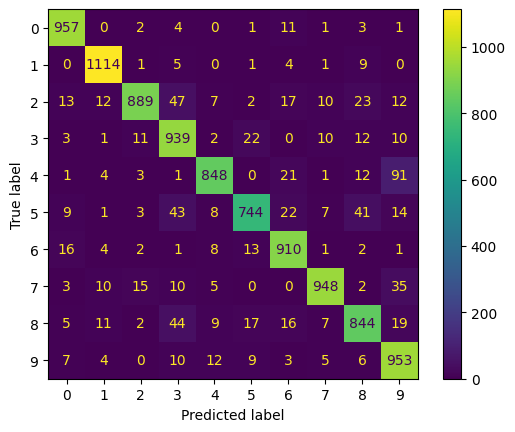

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = confusion_matrix(y_test_list, output_denc)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_display)

cm_display.plot()
plt.show()


#### **Improving Model**

This model can be improved in many ways and is a basic introduction to building a neural network from scratch. Examples of improvements are the use of a mixture of activation functions that are more tailored for the role this neural network is playing, such as ReLU amongst others. Additionally, I have mainly focused on gradient descent as an optimiser yet there are many more that can be much more effective and efficient. Examples include ADAM which focuses on fast computation time or stochastic gradient descent which focuses on generalising data. Choosing an optimum optimiser will depend on the needs and context in which the neural network is being used. Finally, trialling out different learning rates, batches, epochs, etc. will all allow the optimisation of these values thus improving overall performance of the model.